## Set-up your agent

In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.0 MB/s eta 0:00:00


## Add your API Key from Groq

In [ ]:
import os
from groq import Groq

# Set your API key (replace 'your_api_key_here' with your actual Groq API key) - It should look like gsk....
os.environ["GROQ_API_KEY"] = "gsk_xxxxxxxxxxxxxxx"


## AI Agent for Finance to Spot Anomalies and Write FP&A Commentary

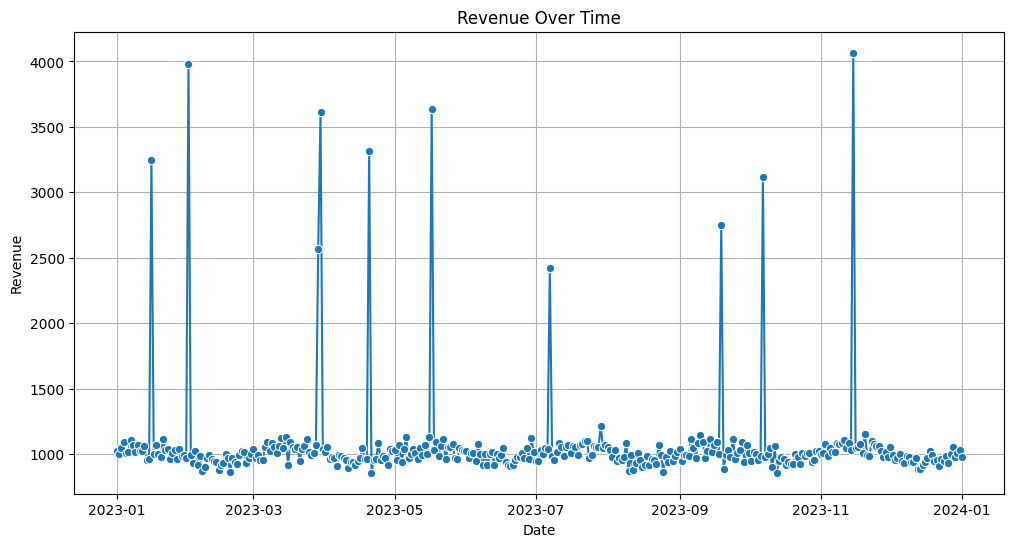

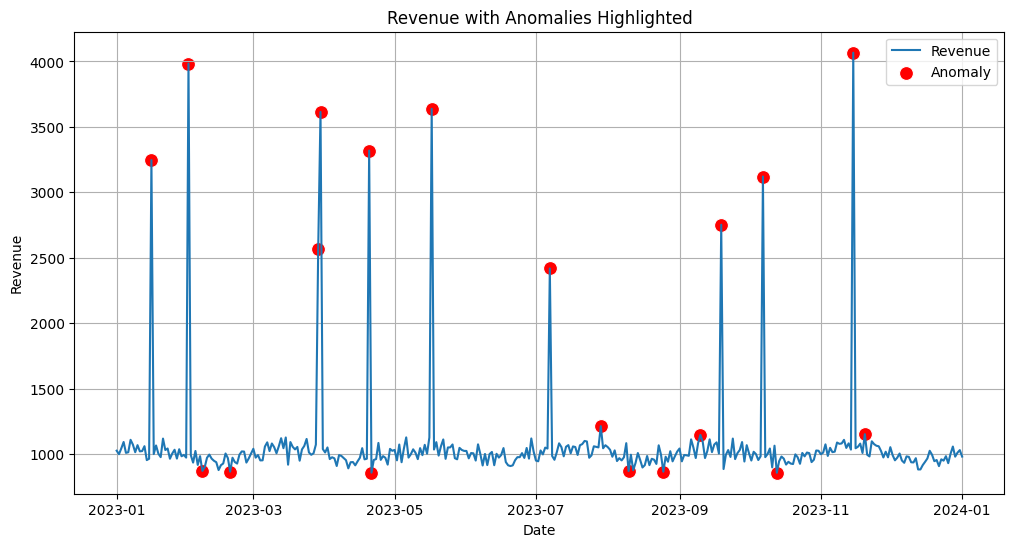

Based on the anomalies detected in the revenue data, the following analysis and recommendations are provided:

**Anomalies Description:**

1. Revenue spikes:
   * Date: 2023-02-01 - Revenue: 3983.460646 (approx. 80% increase from the previous day)
   * Date: 2023-02-07 - Revenue: 870.578353 (approx. 80% decrease from the previous day)
   * Date: 2023-03-30 - Revenue: 3613.698506 (approx. 40% increase from the previous day)
   * Date: 2023-04-20 - Revenue: 3318.919116 (approx. 20% increase from the previous day)
   * Date: 2023-05-17 - Revenue: 3637.344245 (approx. 10% increase from the previous day)
   * Date: 2023-07-07 - Revenue: 2417.347668 (approx. 10% increase from the previous day)
   * Date: 2023-11-15 - Revenue: 4066.444729 (approx. 20% increase from the previous day)
   * Date: 2023-11-20 - Revenue: 1151.155560 (approx. 70% decrease from the previous day)

2. Revenue fluctuations:
   * Date: 2023-09-10 - Revenue: 1145.122602 (approx. 20% increase from the previous day)
   * Da

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from groq import Groq
import os
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = "/content/synthetic_fpna_data_with_anomalies.xlsx" #change if needed and if you are using a different path or file
data = pd.read_excel(file_path)

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the revenue data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=data, marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

# Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = model.fit_predict(data[['Revenue']])
data['Anomaly'] = data['Anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Separate anomalies for easier analysis
anomalies = data[data['Anomaly'] == 'Anomaly']

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=data, label='Revenue')
sns.scatterplot(
    x='Date',
    y='Revenue',
    data=anomalies,
    color='red',
    label='Anomaly',
    s=100,
    marker='o'
)
plt.title('Revenue with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

# Prepare summary for AI Agent
anomaly_summary = f"""
Anomalies Detected in Revenue Data:
- Total Records: {len(data)}
- Anomalies Detected: {len(anomalies)}

Details of Anomalies:
{anomalies[['Date', 'Revenue']].to_string(index=False)}
"""

# AI Integration
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

fpna_chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": (
                "You are an FP&A analyst skilled in anomaly detection and financial commentary. Analyze the anomalies "
                "detected in the revenue data and provide detailed commentary. Include potential reasons for anomalies, "
                "the impact on financial performance, and actionable recommendations."
            ),
        },
        {
            "role": "user",
            "content": (
                f"The revenue data contains anomalies as described below:\n{anomaly_summary}\n"
                "Please provide your FP&A analysis and recommendations."
            ),
        }
    ],
    model="llama3-8b-8192",
)

# Print AI-generated commentary
print(fpna_chat_completion.choices[0].message.content)




## Forecasting with an AI Agent and FP&A Commentary for it

Synthetic dataset saved to synthetic_financial_forecast_data.xlsx


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjyr4nv4d/lvy7swzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjyr4nv4d/h6mbrxwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28594', 'data', 'file=/tmp/tmpjyr4nv4d/lvy7swzk.json', 'init=/tmp/tmpjyr4nv4d/h6mbrxwn.json', 'output', 'file=/tmp/tmpjyr4nv4d/prophet_modelarq6f115/prophet_model-20250124065456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:54:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


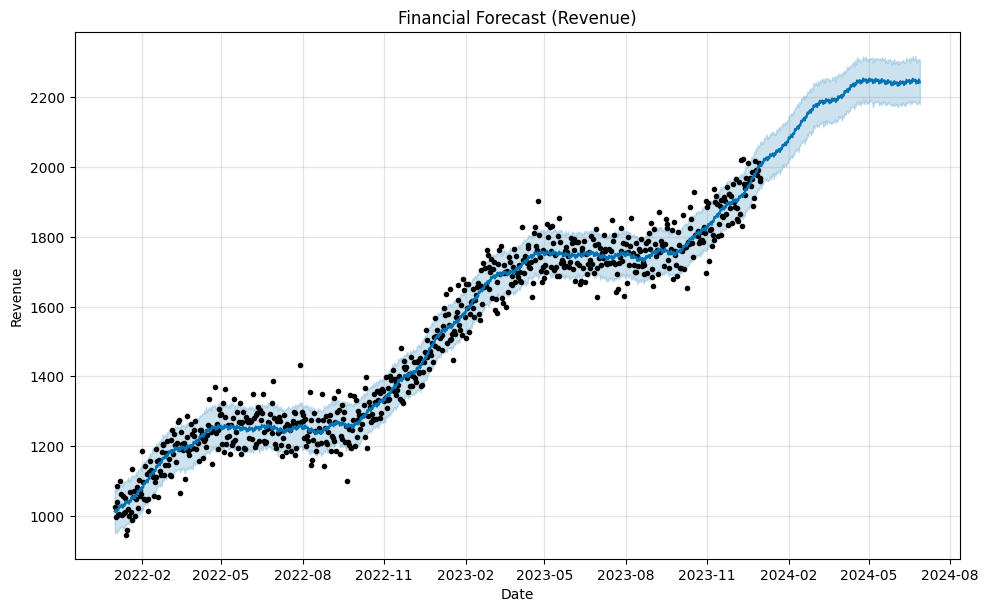

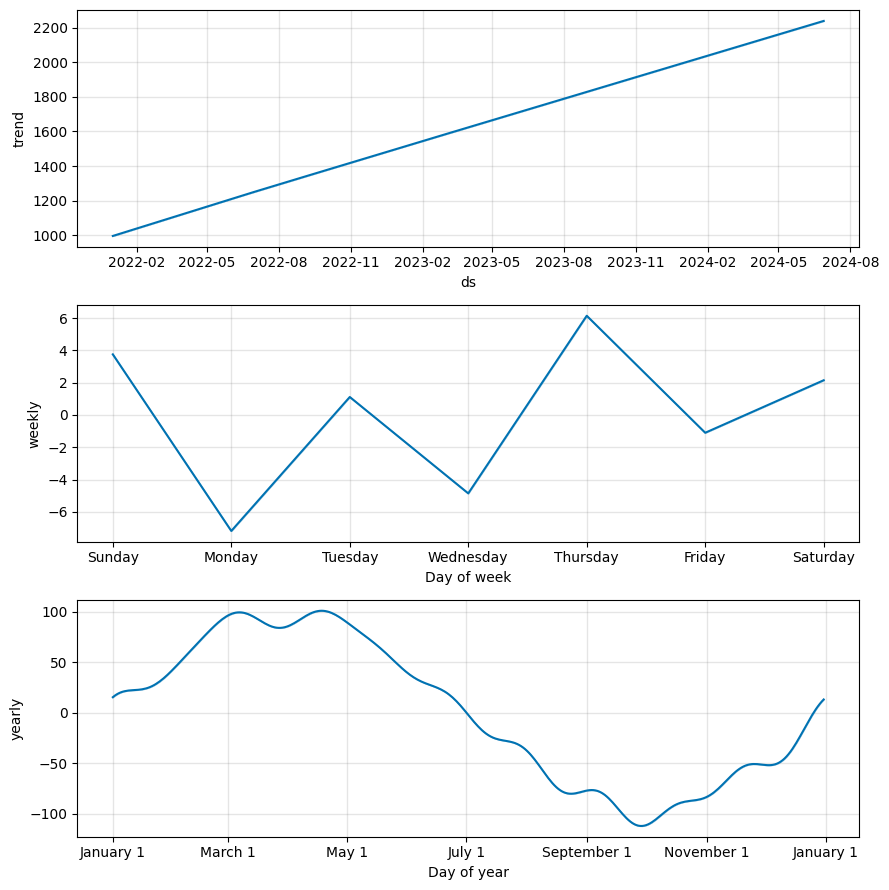

Forecast results saved to financial_forecast_results.xlsx
AI-Generated FP&A Commentary:
Based on the provided financial forecast, here's a summary of the revenue trends, risks, and opportunities, along with actionable commentary for inclusion in a board-level presentation:

**Revenue Trends:**

The average forecasted revenue for the period (2024-01-01 to 2024-06-28) is $2,179.42, which represents a moderate growth pace. The revenue range is relatively narrow, indicating a high degree of certainty in the forecast.

**Risks:**

While the forecast appears promising, there are potential risks to consider:

1. **Global Economic Uncertainty:** The forecast period coincides with the ongoing global economic uncertainty, which may impact consumer spending and business confidence. A potential recession or slower-than-expected economic growth could negatively impact revenue.
2. **Competition:** The forecast does not account for potential changes in the competitive landscape, which could lead to i

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from groq import Groq
import os

# Step 1: Generate Synthetic Dataset
np.random.seed(42)

# Create a date range for two years of daily data
date_range = pd.date_range(start=datetime(2022, 1, 1), end=datetime(2023, 12, 31), freq='D')

# Generate revenue data with a trend, seasonality, and noise
n = len(date_range)
trend = np.linspace(1000, 2000, n)  # Linear growth trend
seasonality = 100 * np.sin(2 * np.pi * date_range.dayofyear / 365.25)  # Yearly seasonality
noise = np.random.normal(0, 50, n)  # Random noise
revenue = trend + seasonality + noise

# Create a DataFrame compatible with Prophet (columns: 'ds' for date, 'y' for value)
data = pd.DataFrame({
    'ds': date_range,
    'y': revenue
})

# Save the synthetic dataset for reference
file_path = "synthetic_financial_forecast_data.xlsx"
data.to_excel(file_path, index=False)
print(f"Synthetic dataset saved to {file_path}")

# Step 2: Forecast Using Prophet
model = Prophet(yearly_seasonality=True)
model.fit(data)

# Create a dataframe for future dates (next 6 months)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Step 3: Visualize the Forecast
fig1 = model.plot(forecast)
plt.title('Financial Forecast (Revenue)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

# Save the forecast to an Excel file
forecast_file_path = "financial_forecast_results.xlsx"
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel(forecast_file_path, index=False)
print(f"Forecast results saved to {forecast_file_path}")

# Step 4: FP&A Commentary Using AI
# Summarize forecasted results for AI agent
forecast_summary = f"""
Financial Forecast Summary:
- Forecasted Period: {forecast['ds'].iloc[-180].strftime('%Y-%m-%d')} to {forecast['ds'].iloc[-1].strftime('%Y-%m-%d')}
- Expected Revenue Range:
  - Lower Bound: ${forecast['yhat_lower'].iloc[-180:].min():,.2f}
  - Upper Bound: ${forecast['yhat_upper'].iloc[-180:].max():,.2f}
- Average Forecasted Revenue: ${forecast['yhat'].iloc[-180:].mean():,.2f}
"""

# Initialize Groq AI client
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

# Define FP&A commentary request
fpna_chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": (
                "You are an experienced FP&A analyst skilled in financial forecasting. Your task is to analyze the provided "
                "financial forecast, focusing on revenue trends, risks, and opportunities. Provide actionable commentary "
                "for inclusion in a board-level presentation."
            ),
        },
        {
            "role": "user",
            "content": (
                f"The financial forecast is summarized as follows:\n{forecast_summary}\n"
                "Please provide your FP&A analysis and recommendations."
            ),
        }
    ],
    model="llama3-8b-8192",
)

# Retrieve AI-generated commentary
ai_commentary = fpna_chat_completion.choices[0].message.content

# Print the AI Commentary
print("AI-Generated FP&A Commentary:")
print(ai_commentary)

# Save commentary to a text file for reference
commentary_file_path = "fpna_commentary.txt"
with open(commentary_file_path, "w") as file:
    file.write("AI-Generated FP&A Commentary:\n")
    file.write(ai_commentary)

print(f"FP&A commentary saved to {commentary_file_path}")
